### 1. Preparation

Installing required libraries

In [2]:
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install scikit-learn

Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Data Preprocessing

##### Import Dataset

In [4]:
df = pd.read_csv('customer_churn_data.csv', sep=';')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


##### Dataset General Info

Checking data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


Change TotalCharges into float64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     829 non-null    float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Check the number of rows and columns

In [8]:
df.shape #rows, cols

(1000, 10)

Check duplicated values

In [9]:
df.duplicated().sum()

np.int64(0)

Check null values

In [10]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges       171
TechSupport          0
Churn                0
dtype: int64

There are two columns that have Null values:

    a. InternetService (object) => we can impute this by creating new category
    b. TotalCharges (float64) => we can impute this by using median

#### Impute Missing Data

##### a. InternetService

Create new category called "Not Mentioned"

In [11]:
df['InternetService'] = df['InternetService'].fillna('Not Mentioned')

<Axes: xlabel='InternetService', ylabel='count'>

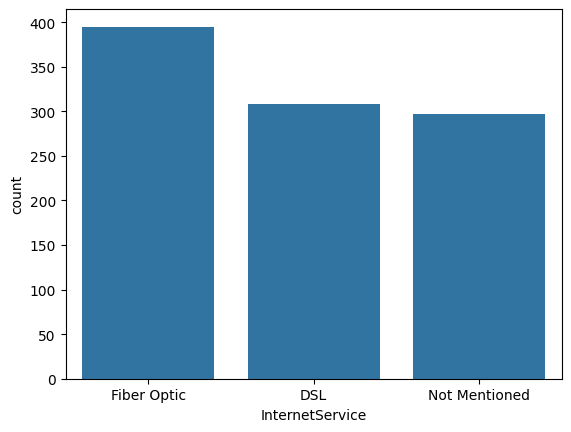

In [12]:
sns.countplot(df, x='InternetService')

**This method is actually a simplified version of SimpleImputer (without using sklearn library), for reference:**

https://www.youtube.com/watch?v=k3KrhjvaCq0

We can impute the "Not Mentioned" values using One Hot Encoder:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

or by using "simpleImputer":

https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

##### b. TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

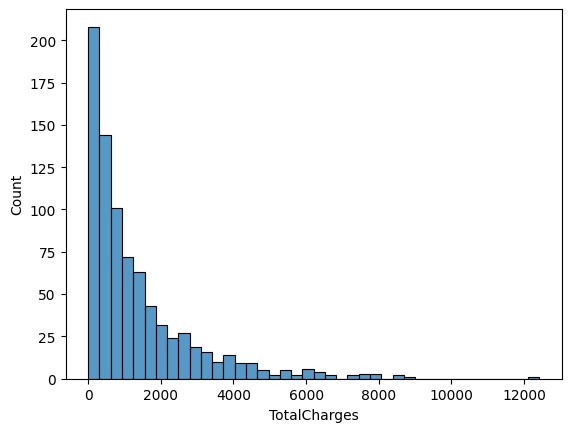

In [13]:
sns.histplot(df, x='TotalCharges')

The distribution is not normal, therefore we need to use median to impute the data

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
df['TotalCharges'].isnull().sum()

np.int64(0)

#### Labeling Churn Data

To make it easier for analysis, we can change the labeling of Churn column (which is Yes or No) into a binary value (0 and 1) using LabelEncoder from scikitlearn

In [16]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['Churn'] = label_encoder.fit_transform(df['Churn'])

df['Churn'].unique()

array([1, 0])

#### Dataset Statistical Info

In [18]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1256.095960,0.883000
std,288.819436,9.797741,18.89257,25.712083,1453.373048,0.321581
min,1.000000,12.000000,0.00000,30.000000,0.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,377.400000,1.000000
50%,500.500000,45.000000,13.00000,74.060000,796.320000,1.000000
75%,750.250000,51.000000,26.00000,96.102500,1509.257500,1.000000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000,1.000000


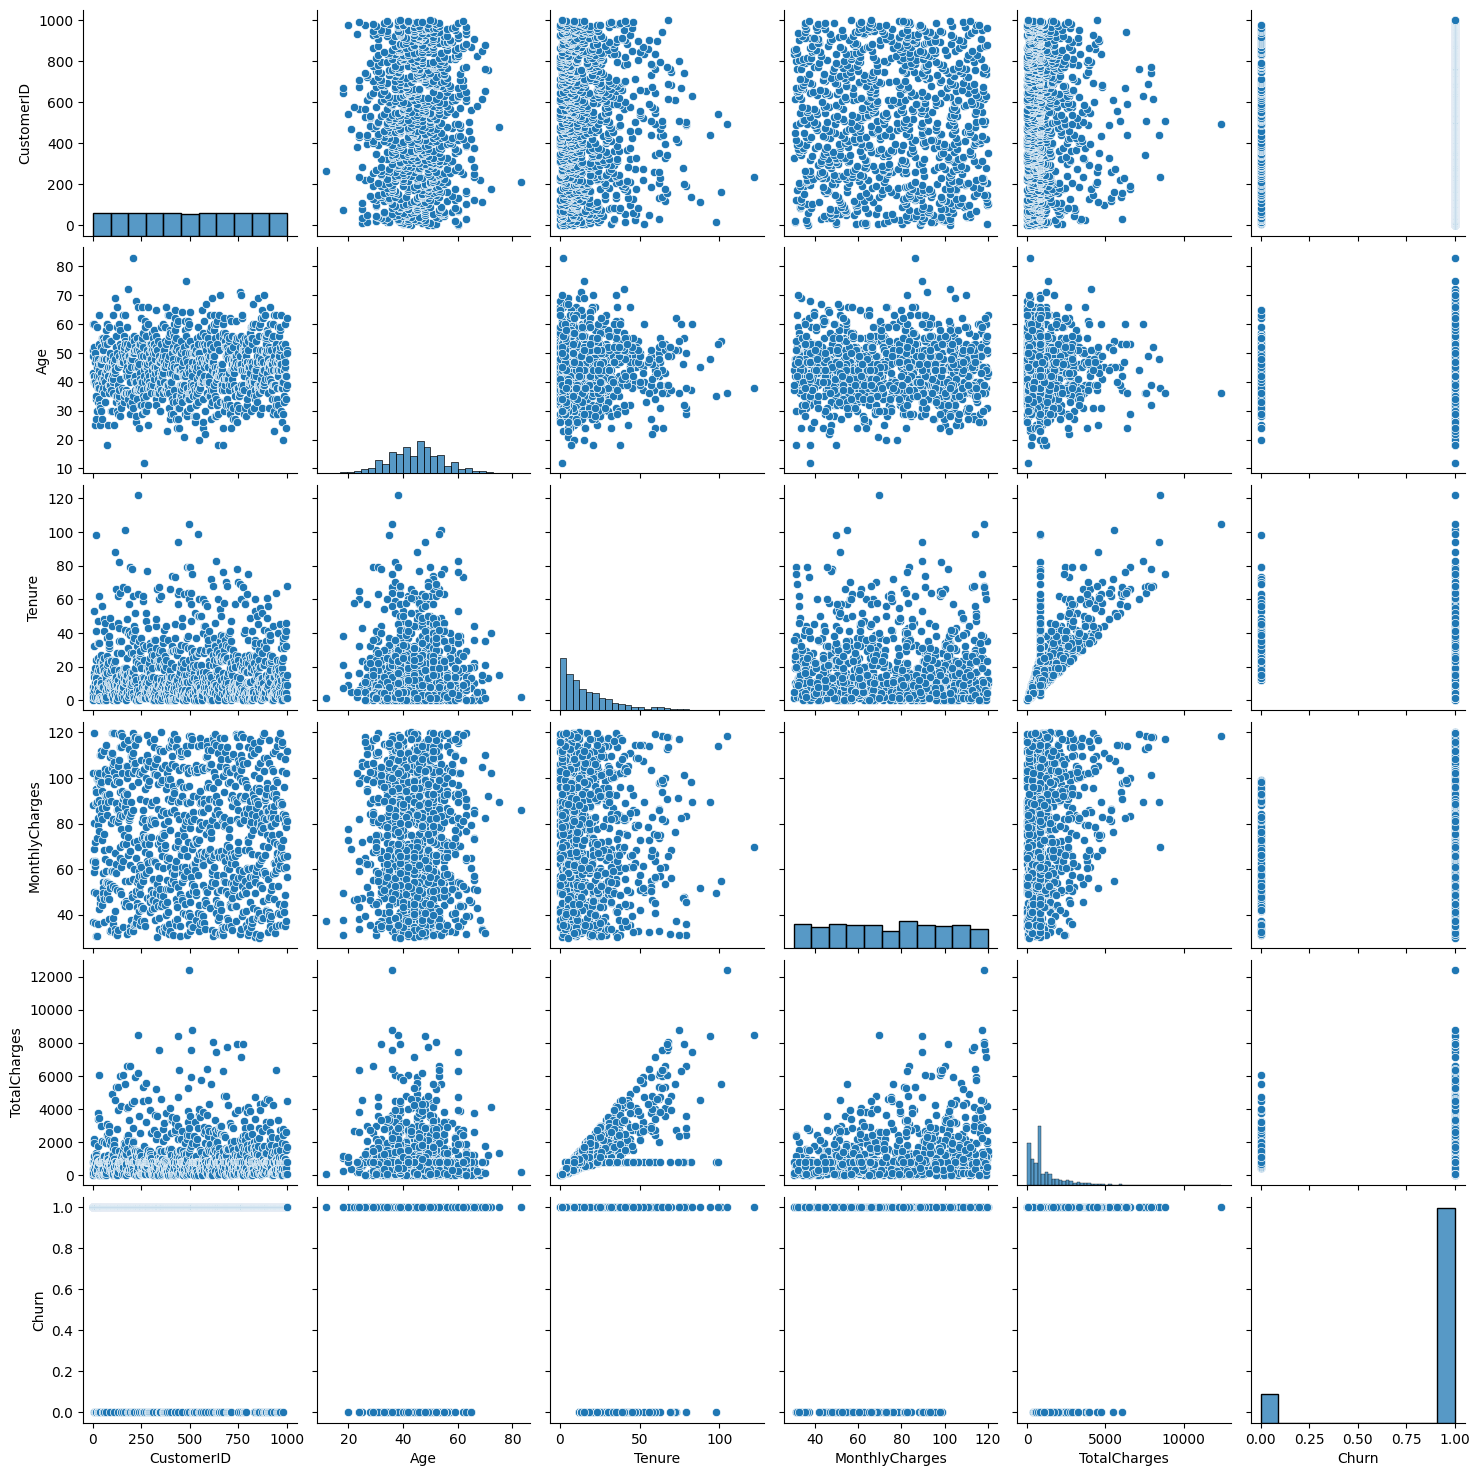

In [19]:
sns.pairplot(df)

Let's take a look at the correlation by using Heatmap:

In [20]:
numeric_columns = df.select_dtypes(np.number)
corr = numeric_columns.corr()
corr

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.000316,0.023867
Age,0.036730,1.000000,0.000472,0.006362,-0.004304,0.044115
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.793662,-0.217675
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.280125,0.167773
TotalCharges,-0.000316,-0.004304,0.793662,0.280125,1.000000,-0.062368
Churn,0.023867,0.044115,-0.217675,0.167773,-0.062368,1.000000


<Axes: >

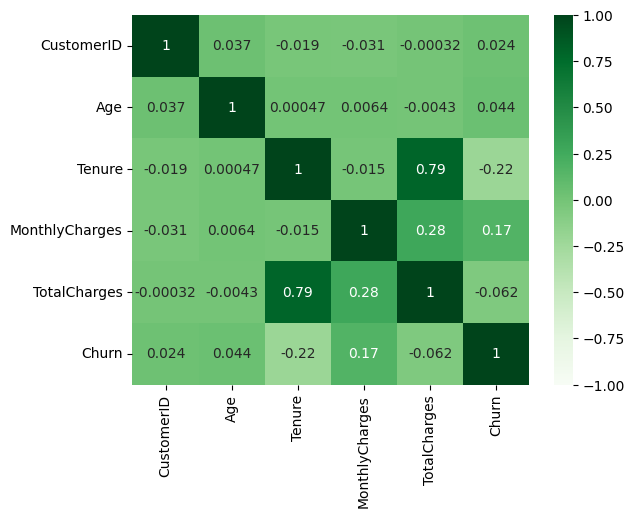

In [21]:
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)

Based on the correlation table and heatmap above, we can infer that:

- Tenure have pretty high correlation with TotalCharges, with the value being 79%
- MonthlyCharges have low correlation with TotalCharges, with the value being 28%

### 2. Statistical Test

#### 2a. Business Question

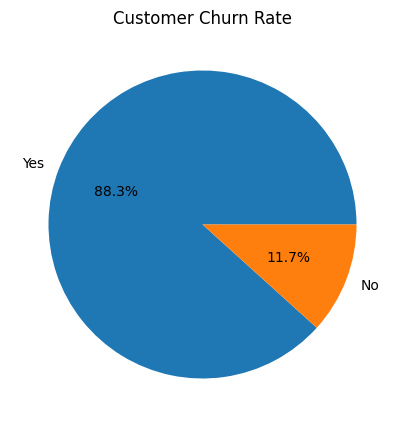

In [22]:
plt.figure(figsize=(10,5))

churn_counts = df['Churn'].value_counts()

labels = ['Yes', 'No']
sizes = [churn_counts[1], churn_counts[0]] 

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

In [23]:
#average monthly charges
df['MonthlyCharges'].mean() #around $75 per month

np.float64(74.39129000000001)

Based on the pie chart above, we can infer that the churn rate for this telecom company is 88.3%, which is way higher than the industry standard (31%). A sales manager noticed this and assumed that most the customers churned due to the average monthly charges (now $74 per month).

#### 2b. Define Hypothesis

Based on the business question above (by the sales manager), we can make a hypothesis that states:

**- H0: The average monthly charges for customers who churned is equal to $74.**

**- H1: The average monthly charges for customers who churned is not equal to $74.**

Based on this hypotheses above, we will use two-tailed test (because the H1 != θ0)

#### 2c. Hypothesis Testing using T-Test

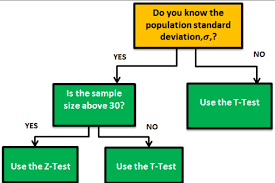

Why T-Test?
- Unknown standard deviation from population (not mentioned)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

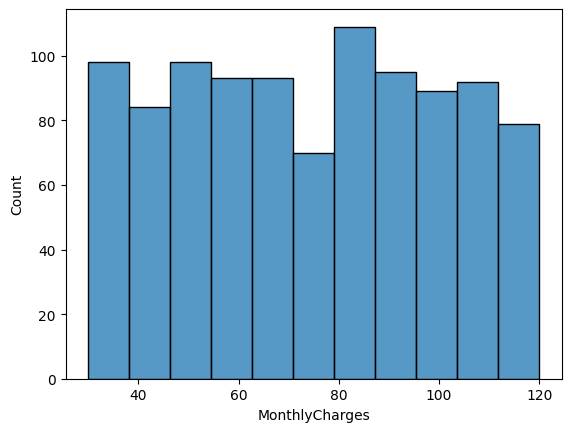

In [24]:
#visualize the distribution for monthly charges and customer churn
sns.histplot(df['MonthlyCharges'])

In [25]:
df['MonthlyCharges'].describe()

count    1000.000000
mean       74.391290
std        25.712083
min        30.000000
25%        52.357500
50%        74.060000
75%        96.102500
max       119.960000
Name: MonthlyCharges, dtype: float64

##### 2.c.1. Calculate T-Statistics

Next is we want to compute t-statistics, with the formula being:

$$ t = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}}$$

- t-value tells us about how far the deviation sample mean $\bar{x}$ and population mean $\mu$ under assumption $H_0$ is true.
- We will use the ttest_1samp() function to calculate t-statistics and p-value for one-sample mean test

In [26]:
#create statistical test for T-Value
from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df['MonthlyCharges'], popmean=74, alternative='two-sided') #h1 != theta 0
print(f"t statistics: {t_statistics:.4f}")
print(f"p-value: {p_value:.4f}")

t statistics: 0.4812
p-value: 0.6305


##### 2.c.2. Defined Significance Level

Next is to find critical value based on alpha (significance level), which is 5% and because there is two regions (left and right), we divided the alpha into two:

In [36]:
from scipy.stats import t
t_crit = t.ppf(1-0.025, df = 1000-1) #the dataset have 1000 rows
print(f'The critical value will be : ±{t_crit:.2f}')

The critical value will be : ±1.96


The critical region will be in:

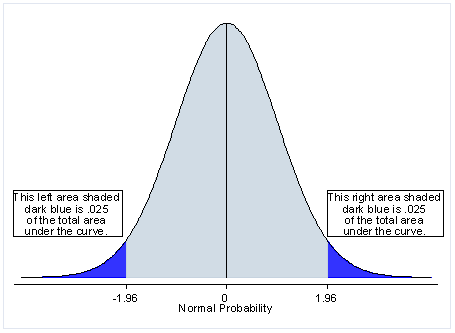

##### 2.c.3. Reject/Accept H0 based on Decision Rules

After that, we can create decision rules to either reject H0 or accept H0 based on t-statistic and p-value results

In [32]:
alpha = 0.05

if p_value<alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [33]:
if t_statistics>t_crit or t_statistics <-t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


Visualize the critical region

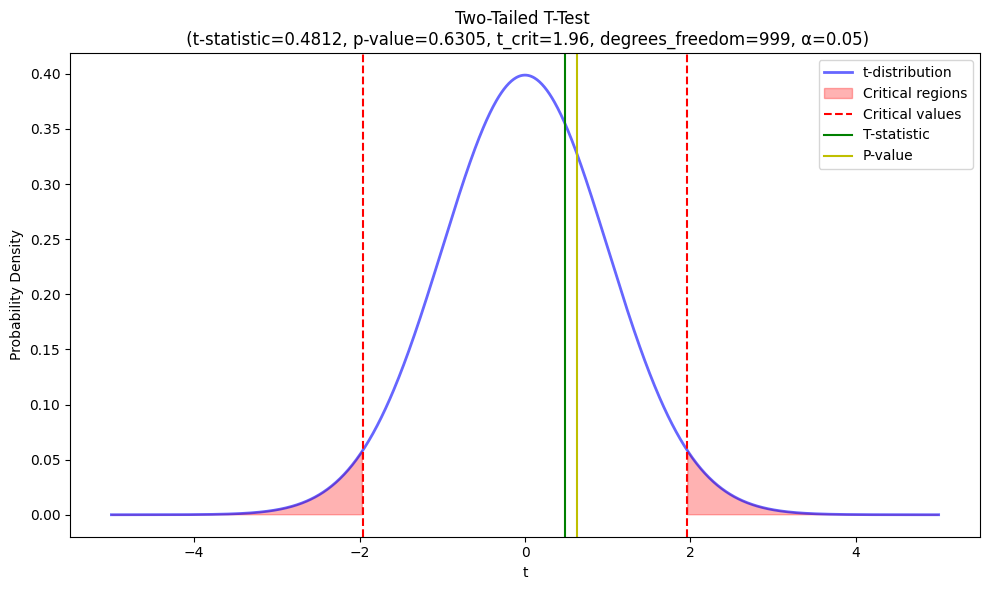

In [73]:
# #degrees of freedom
degree_freedom = 1000-1

# Create the plot
plt.figure(figsize=(10, 6))

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Plot the t-distribution
plt.plot(x, t.pdf(x, degree_freedom), 'b-', lw=2, alpha=0.6, label='t-distribution')

# Fill the critical regions
plt.fill_between(x, 0, t.pdf(x, degree_freedom), where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical regions')

# Add vertical lines for critical values and t-statistic
plt.axvline(-t_crit, color='r', linestyle='--', label='Critical values')
plt.axvline(t_crit, color='r', linestyle='--')
plt.axvline(t_statistics, color='g', linestyle='-', label='T-statistic')
plt.axvline(p_value, color='y', linestyle='-', label='P-value')

# Labeling
plt.title(f"Two-Tailed T-Test \n (t-statistic={t_statistics:.4f}, p-value={p_value:.4f}, t_crit={t_crit:.2f}, degrees_freedom={degree_freedom}, α={alpha})")
plt.xlabel('t')
plt.ylabel('Probability Density')

# Add text annotations
# plt.text(0, 0.2, f't-statistic: {t_statistics:.4f}\np-value: {p_value:.4f}', ha='center', va='center', 
#          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 2d. Decision Results

**There is not enough evidence to say that the average monthly charge for the customer who churned is not equal to $74**.

Manager should reconsider the monthly charge in order to retain customers.

### 3. Regression Model

#### 3a. Single Predictor (Linear Regression)

**Find the association between TotalCharges and Tenure**

$$y = β0 + β1X$$

Tenure as the output and TotalCharges as the Input

$$Tenure = β0 + β1TotalCharges$$

##### 3.a.1. Plot the Values

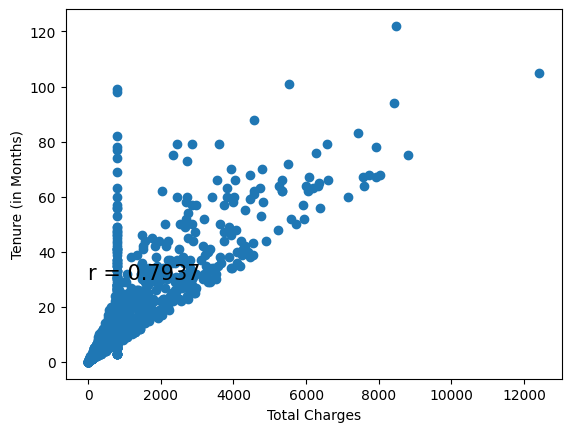

In [83]:
r = scipy.stats.pearsonr(x=df['TotalCharges'], y=df['Tenure'])[0]

# sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['TotalCharges'], y=df['Tenure'])

plt.xlabel('Total Charges')
plt.ylabel('Tenure (in Months)')

plt.text(5,30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

##### 3.a.2. Split the Values into Train and Test

In [84]:
from sklearn.model_selection import train_test_split

X = df['TotalCharges']
y = df['Tenure']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42) #split the data into 80/20 (80 for train, 20 for test)

Check the training values

In [85]:
X_train

29     6054.92
535    2157.96
695    1568.00
557    5723.00
836    4747.21
        ...   
106    1199.00
270     408.45
860    4324.65
435    1405.56
102     796.32
Name: TotalCharges, Length: 800, dtype: float64

In [86]:
y_train

29     62
535    21
695    32
557    50
836    53
       ..
106    10
270     5
860    55
435    12
102    20
Name: Tenure, Length: 800, dtype: int64

##### 3.a.3. Reshape the Data

In [87]:
X_train = np.array(X_train).reshape(-1, 1)
X_train

array([[6054.92],
       [2157.96],
       [1568.  ],
       [5723.  ],
       [4747.21],
       [2638.13],
       [1850.52],
       [ 437.  ],
       [2847.95],
       [ 338.4 ],
       [ 544.8 ],
       [ 669.76],
       [ 255.69],
       [1332.24],
       [ 796.32],
       [2492.28],
       [ 326.64],
       [ 571.22],
       [4551.69],
       [ 694.88],
       [  81.38],
       [ 361.64],
       [   0.  ],
       [2078.56],
       [4575.  ],
       [ 127.58],
       [ 796.32],
       [4578.7 ],
       [1704.  ],
       [ 208.26],
       [ 360.01],
       [  78.63],
       [ 796.32],
       [2688.88],
       [  90.4 ],
       [   0.  ],
       [6195.42],
       [ 796.32],
       [ 558.62],
       [ 778.14],
       [ 818.72],
       [ 796.32],
       [ 461.4 ],
       [1581.36],
       [ 796.32],
       [1846.8 ],
       [  35.56],
       [ 985.38],
       [2147.1 ],
       [ 812.89],
       [ 796.32],
       [2621.76],
       [ 778.58],
       [ 796.32],
       [4029.96],
       [ 3

In [88]:
X_test = np.array(X_test).reshape(-1, 1)
X_test

array([[    0.  ],
       [  238.66],
       [ 1297.56],
       [ 2947.88],
       [  329.82],
       [  489.87],
       [ 3316.5 ],
       [  868.75],
       [  623.2 ],
       [  796.32],
       [    0.  ],
       [ 1237.86],
       [   86.05],
       [  796.32],
       [  286.92],
       [  796.32],
       [  796.32],
       [ 1322.96],
       [   33.61],
       [   75.66],
       [  712.64],
       [  158.6 ],
       [  933.66],
       [  297.7 ],
       [ 4468.8 ],
       [ 3564.75],
       [    0.  ],
       [ 1854.02],
       [  139.74],
       [  796.32],
       [  796.32],
       [  585.27],
       [ 2261.44],
       [ 1607.04],
       [  211.06],
       [  796.32],
       [ 1661.55],
       [  601.76],
       [  796.32],
       [   73.86],
       [  472.23],
       [ 1209.23],
       [ 2722.56],
       [  441.95],
       [ 2552.87],
       [ 1428.6 ],
       [  796.32],
       [  629.76],
       [ 2171.7 ],
       [ 1305.45],
       [  940.66],
       [  478.4 ],
       [  51

##### 3.a.4. Import Regression Model from scikit

In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

##### 3.a.5. Fit Training Values Into The Model

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
intercept = lr.intercept_ #slope
coefficient = lr.coef_ #beta-1

print(f'Intercept: {intercept} \nCoefficient: {coefficient}')

Intercept: 5.329442626107722 
Coefficient: [0.01082616]


In [104]:
print(lr.score(X_test, y_test))

0.5380844577235981


##### 3.a.6. Coefficient Interpretation

$$Tenure =  5.3294 + 0.0108TotalCharges$$

##### 3.a.7. Predict The Values

In [99]:
#using training values
y_predict_train1 = lr.predict(X_train)
y_predict_train1.flatten()

array([ 70.8809771 ,  28.69186349,  22.30486196,  67.28755798,
        56.72349903,  33.89026088,  25.36346877,  10.06047467,
        36.16180583,   8.99301527,  11.22753475,  12.58037174,
         8.09758355,  19.75248641,  13.95053059,  32.3112654 ,
         8.86569962,  11.51356191,  54.60676817,  12.85232489,
         6.21047555,   9.24461523,   5.32944263,  27.83226636,
        54.85912596,   6.71064416,  13.95053059,  54.89918276,
        23.77721976,   7.58409877,   9.22696859,   6.18070361,
        13.95053059,  34.43968851,   6.30812752,   5.32944263,
        72.40205263,  13.95053059,  11.37715229,  13.753711  ,
        14.19303658,  13.95053059,  10.32463299,  22.44949947,
        13.95053059,  25.32319545,   5.71442089,  15.99732446,
        28.57429139,  14.12992007,  13.95053059,  33.71303663,
        13.75847451,  13.95053059,  48.95843556,   8.79727829,
        31.07091222,  13.95053059,  30.24043746,  26.07236575,
        14.87162031,   5.32944263,   7.25476697,   5.70

In [100]:
#using testing values
y_predict_test1 = lr.predict(X_test)
y_predict_test1.flatten()

array([  5.32944263,   7.91321404,  19.37703518,  37.24366403,
         8.90012681,  10.63285377,  41.23440324,  14.73466938,
        12.07630572,  13.95053059,   5.32944263,  18.73071341,
         6.26103372,  13.95053059,   8.43568454,  13.95053059,
        13.95053059,  19.65201965,   5.69330987,   6.14854991,
        13.0445975 ,   7.04647165,  15.43739544,   8.55239055,
        53.70938774,  43.92199753,   5.32944263,  25.40136033,
         6.84229027,  13.95053059,  13.95053059,  11.66566946,
        29.81215456,  22.72751526,   7.61441202,  13.95053059,
        23.31764926,  11.84419284,  13.95053059,   6.12906283,
        10.4418803 ,  18.42076044,  34.80431359,  10.11406417,
        32.96722245,  20.79569522,  13.95053059,  12.14732533,
        28.84061493,  19.46245358,  15.51317857,  10.50867771,
        10.93057318,  13.95053059,  16.1068852 ,  42.97395067,
        92.23536176,   6.01722859,  13.95053059,  13.95053059,
        19.37746822,  13.95053059,  13.95053059,   7.19

##### 3.a.8. Fit A Line Into The Plot

X_train and y_train

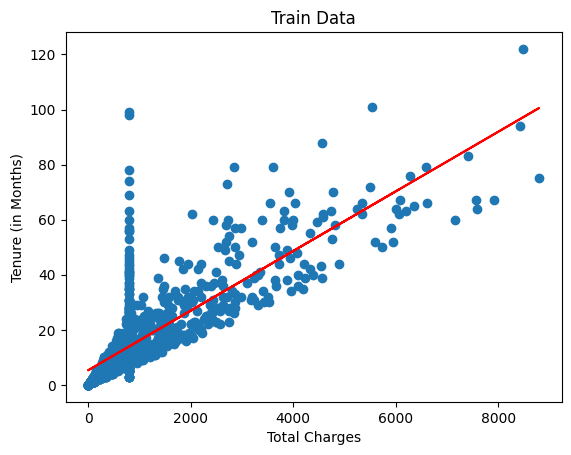

In [102]:
plt.scatter(x=X_train, y=y_train)
plt.plot(X_train, y_predict_train1, color='red')

plt.xlabel('Total Charges')
plt.ylabel('Tenure (in Months)')
plt.title('Train Data')

plt.show()

X_test and y_test

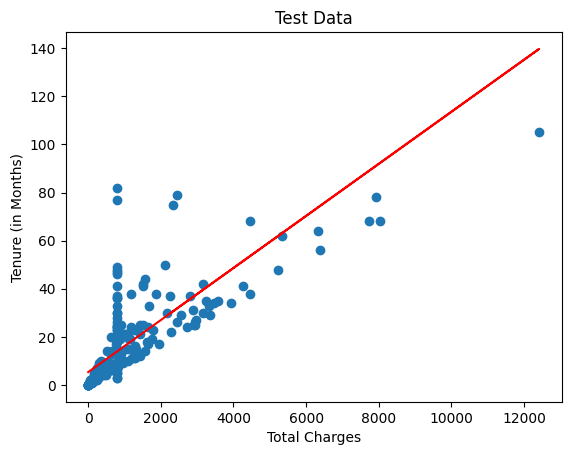

In [103]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_predict_test1, color='red')

plt.xlabel('Total Charges')
plt.ylabel('Tenure (in Months)')
plt.title('Test Data')

plt.show()

Evaluate Model Test

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_predict_test1) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_predict_test1) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=y_predict_test1,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 8.393063976255924
MSE: 162.53048034490513
RMSE: 12.748744265413167


e:\Pacmann Final Project - Statistics for Business\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 3b. Multiple Predictor (Logistic Regression) => Binary Data

### 4. Conclusion and Recommendation